## <div align="center"> UAS LAB IF540 MACHINE LEARNING </div>
## <div align="center"> Semester Gasal 2023/2024 </div>
### <div align="center"> PREDIKSI RISIKO PENYAKIT JANTUNG MENGGUNAKAN ALGORITMA SUPPORT VECTOR MACHINE </div>

### Header

In [33]:
import datetime

myGroup = "Kelompok A"
myDate = datetime.datetime.now()

# Header
print("Kelompok   : {}".format(myGroup))
print("Time-stamp : {}".format(myDate))

Kelompok   : Kelompok A
Time-stamp : 2023-12-10 22:26:53.091926


### Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

### Import Dataset

In [3]:
heart = pd.read_csv('heart.csv')
heart.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### Informasi Dataset

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Visualisasi Data

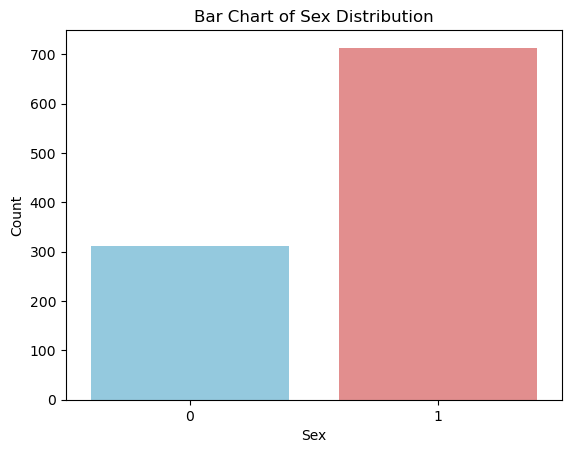

In [5]:
sex_counts = heart['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=['skyblue', 'lightcoral'])
plt.title('Bar Chart of Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

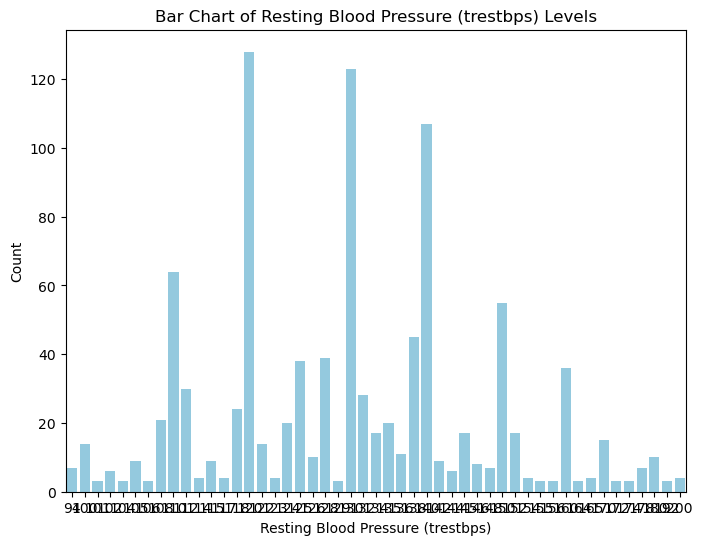

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='trestbps', data=heart, color='skyblue')
plt.title('Bar Chart of Resting Blood Pressure (trestbps) Levels')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Count')
plt.show()

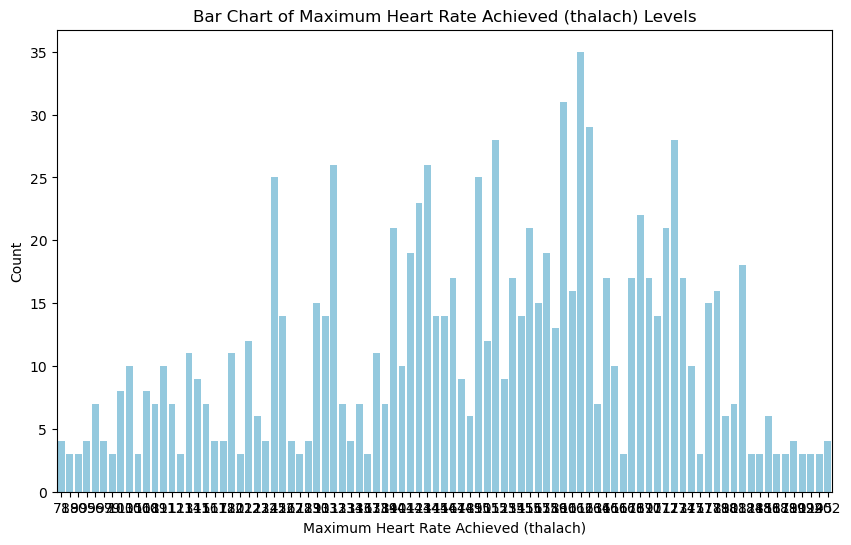

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='thalach', data=heart, color='skyblue')
plt.title('Bar Chart of Maximum Heart Rate Achieved (thalach) Levels')
plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.ylabel('Count')
plt.show()

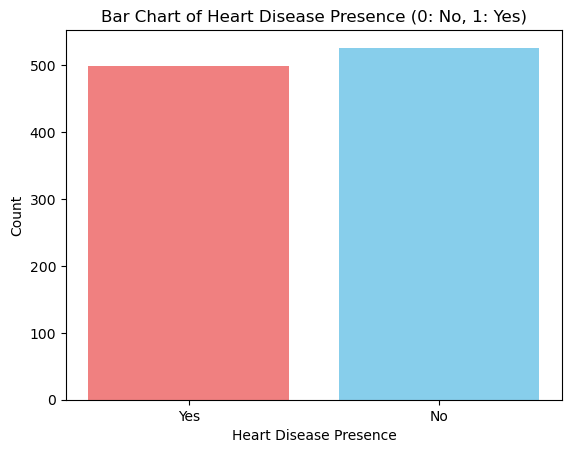

In [8]:
# Jumlah masing-masing nilai pada kolom 'target'
target_counts = heart['target'].value_counts()

# Bar chart
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Bar Chart of Heart Disease Presence (0: No, 1: Yes)')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.xticks(target_counts.index, ['No', 'Yes'])
plt.show()

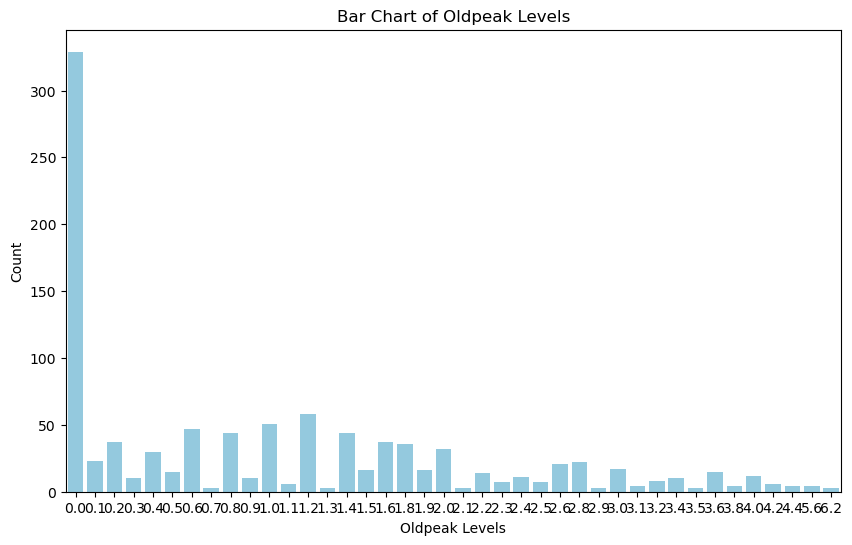

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='oldpeak', data=heart, color='skyblue')
plt.title('Bar Chart of Oldpeak Levels')
plt.xlabel('Oldpeak Levels')
plt.ylabel('Count')
plt.show()

### Visualisasi Heatmap

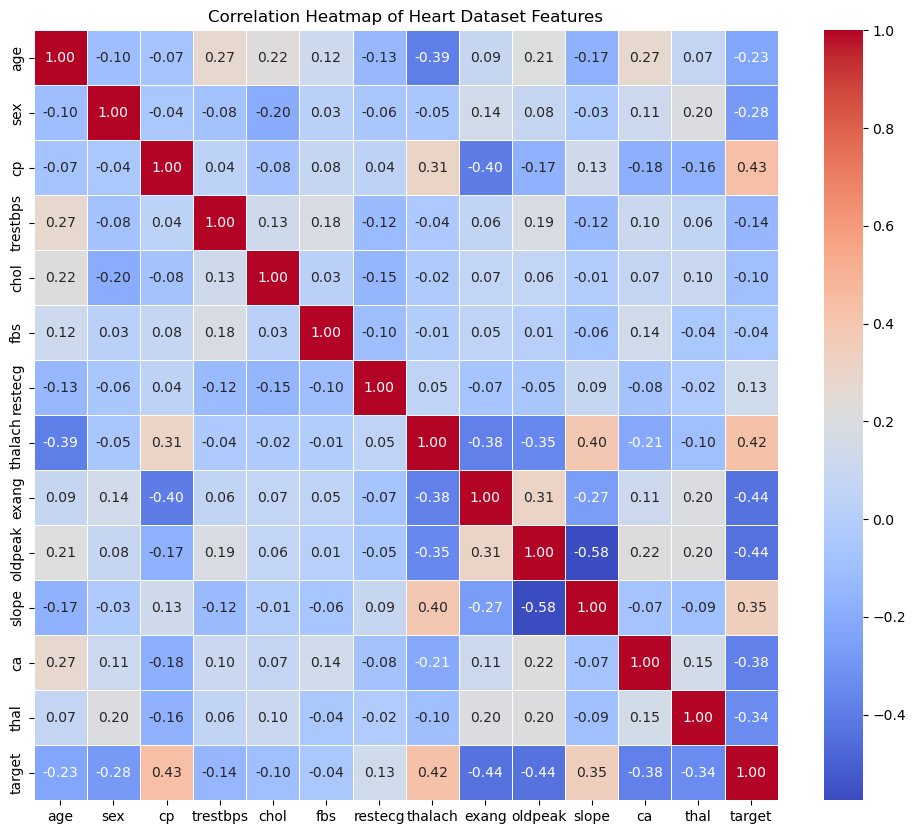

In [10]:
# Matriks korelasi
correlation_matrix = heart.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Heart Dataset Features')
plt.show()

### Cek Outlier

<AxesSubplot:xlabel='chol', ylabel='Count'>

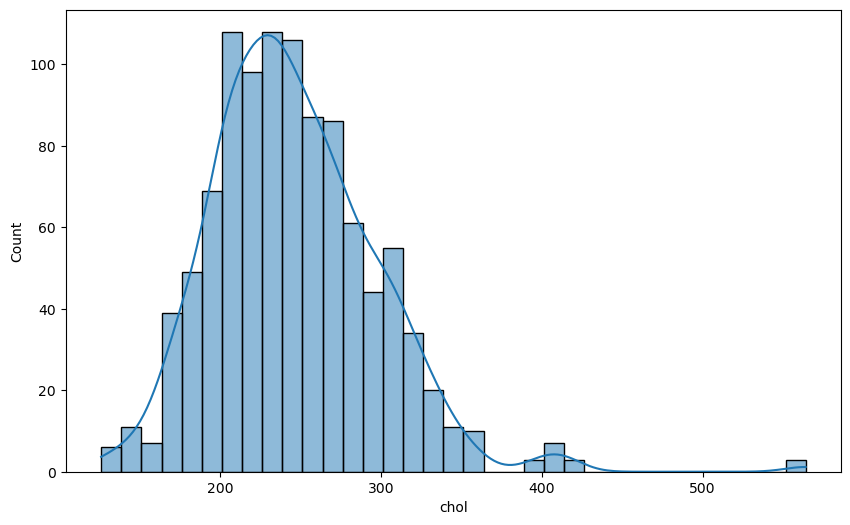

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(heart["chol"], kde=True)

### Jumlah nilai NULL atau NaN pada dataset

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Bar Chart

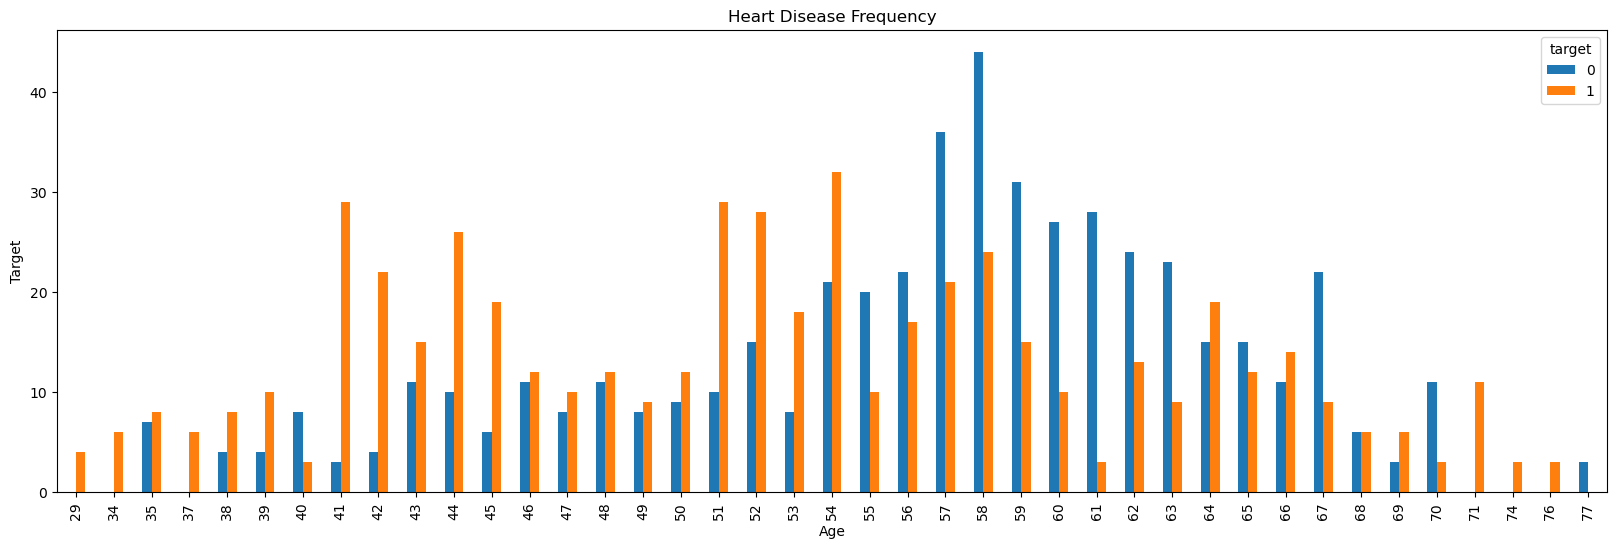

In [13]:
pd.crosstab(heart['age'], heart['target']).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency')
plt.xlabel('Age')
plt.ylabel('Target')
plt.show()

### Melatih SVM dan memisahkan dataset

In [14]:
# Memisahkan fitur (X) dan label (y)
X = heart.drop('target', axis=1)
y = heart['target']

# Memisahkan dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.098, random_state=42)

In [15]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Melakukan prediksi probabilitas pada set pengujian
probabilities_all_svm = svm_model.predict_proba(X_test_scaled)

# Menampilkan seluruh data dalam bentuk tabel tanpa elipsis
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

result_df_svm = pd.DataFrame({
    'Probabilitas Kelas 0': 1 - probabilities_all_svm[:, 1],
    'Probabilitas Kelas 1': probabilities_all_svm[:, 1],
    'Resiko': pd.cut(probabilities_all_svm[:, 1], bins=[-float('inf'), 0.1, 0.2, 0.3, 0.4, float('inf')],
                     labels=['Resiko Rendah', 'Resiko Sedang', 'Resiko Tinggi', 'Resiko Sangat Tinggi', 'Resiko Berat'])
})

### **Underfit / Overfit checking**

In [16]:
# Menentukan dataset
X = heart.drop('target', axis=1)
y = heart['target']

print(X.shape, y.shape)

(1025, 13) (1025,)


In [17]:
# Melakukan split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.098, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(924, 13) (101, 13) (924,) (101,)


>1, train: 0.760, test: 0.762
>2, train: 0.760, test: 0.723
>3, train: 0.841, test: 0.782
>4, train: 0.868, test: 0.842
>5, train: 0.927, test: 0.832
>6, train: 0.965, test: 0.921
>7, train: 0.976, test: 0.950
>8, train: 0.992, test: 0.960
>9, train: 0.996, test: 0.970


>10, train: 1.000, test: 0.970
>11, train: 1.000, test: 0.970
>12, train: 1.000, test: 0.970
>13, train: 1.000, test: 0.970
>14, train: 1.000, test: 0.970
>15, train: 1.000, test: 0.970
>16, train: 1.000, test: 0.970
>17, train: 1.000, test: 0.970
>18, train: 1.000, test: 0.970
>19, train: 1.000, test: 0.970
>20, train: 1.000, test: 0.970
>21, train: 1.000, test: 0.970
>22, train: 1.000, test: 0.970
>23, train: 1.000, test: 0.970
>24, train: 1.000, test: 0.970
>25, train: 1.000, test: 0.970
>26, train: 1.000, test: 0.970
>27, train: 1.000, test: 0.970
>28, train: 1.000, test: 0.970
>29, train: 1.000, test: 0.970
>30, train: 1.000, test: 0.970
>31, train: 1.000, test: 0.970
>32, train: 1.000, test: 0.970
>33, train: 1.000, test: 0.970
>34, train: 1.000, test: 0.970
>35, train: 1.000, test: 0.970
>36, train: 1.000, test: 0.970
>37, train: 1.000, test: 0.970
>38, train: 1.000, test: 0.970
>39, train: 1.000, test: 0.970
>40, train: 1.000, test: 0.970
>41, train: 1.000, test: 0.970
>42, tra

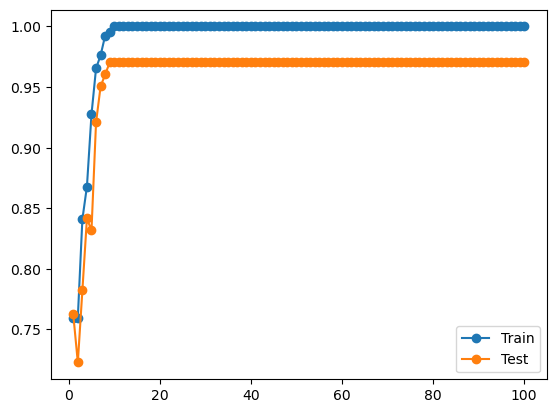

In [18]:
# Menentukan list untuk mengumpulkan skor
train_scores, test_scores = list(), list()
# Menentukan kedalaman tree yang akan dievaluasi
values = [i for i in range(1, 101)]
# Mengevaluasi decision tree dari setiap kedalaman
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# Plotting skor train dan test dengan kedalaman tree
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 1.000, test: 0.970


>2, train: 1.000, test: 0.970
>3, train: 0.999, test: 0.941
>4, train: 0.990, test: 0.891
>5, train: 0.973, test: 0.772
>6, train: 0.840, test: 0.762
>7, train: 0.803, test: 0.723
>8, train: 0.795, test: 0.703
>9, train: 0.764, test: 0.733
>10, train: 0.776, test: 0.733
>11, train: 0.781, test: 0.733
>12, train: 0.779, test: 0.713
>13, train: 0.756, test: 0.703
>14, train: 0.759, test: 0.693
>15, train: 0.760, test: 0.683
>16, train: 0.768, test: 0.683
>17, train: 0.761, test: 0.683
>18, train: 0.765, test: 0.683
>19, train: 0.759, test: 0.683
>20, train: 0.760, test: 0.713
>21, train: 0.753, test: 0.693
>22, train: 0.751, test: 0.713
>23, train: 0.762, test: 0.703
>24, train: 0.759, test: 0.703
>25, train: 0.756, test: 0.703
>26, train: 0.742, test: 0.683
>27, train: 0.738, test: 0.693
>28, train: 0.731, test: 0.693
>29, train: 0.738, test: 0.683
>30, train: 0.736, test: 0.693
>31, train: 0.744, test: 0.673
>32, train: 0.724, test: 0.663
>33, train: 0.727, test: 0.663
>34, train: 0.73

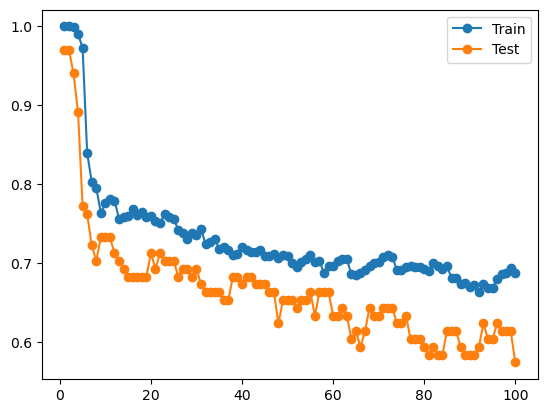

In [19]:
# Menentukan kedalaman pohon yang akan dievaluasi
values = [i for i in range(1, 101)]

# Menginisialisasi list untuk simpan skor
train_scores = []
test_scores = []

# Mengevaluasi decision tree dari setiap kedalaman
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# Plotting skor train dan test dengan kedalaman tree
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

**Kesimpulannya:**

-  Melihat dari grafik yang ditampilkan, nilai akurasi data train lebih tinggi dibandingkan dengan data test. Maka dari itu, dapat disimpulkan model cenderung mengalami **overfitting.**

### Klasifikasi index sesuai resiko penyakit jantung

In [20]:
print(result_df_svm)

     Probabilitas Kelas 0  Probabilitas Kelas 1                Resiko
0                0.004683              0.995317          Resiko Berat
1                0.053466              0.946534          Resiko Berat
2                0.999335              0.000665         Resiko Rendah
3                0.000010              0.999990          Resiko Berat
4                0.947567              0.052433         Resiko Rendah
5                0.053447              0.946553          Resiko Berat
6                0.948773              0.051227         Resiko Rendah
7                0.997142              0.002858         Resiko Rendah
8                0.021569              0.978431          Resiko Berat
9                0.965905              0.034095         Resiko Rendah
10               0.018366              0.981634          Resiko Berat
11               0.979552              0.020448         Resiko Rendah
12               0.038198              0.961802          Resiko Berat
13               0.0

### Klasifikasi index sesuai input user

In [21]:
# Melakukan prediksi probabilitas pada set pengujian
probs_all_svm = svm_model.predict_proba(X_test_scaled)

while True:
  input_index = input("Input index ke (ketik 'selesai' untuk keluar): ")

  if input_index.lower() == 'selesai':
    break

  try:
    index = int(input_index)

    if 0 <= index < len(probs_all_svm):
      prob_class_1 = probs_all_svm[index, 1]

      # Menampilkan hasil prediksi probabilitas untuk indeks yang diinput
      print(f"Prediksi probabilitas untuk indeks {index}:")
      print(f"Probabilitas kelas 0 (Tidak terkena penyakit jantung): {1 - prob_class_1:.4f}")
      print(f"Probabilitas kelas 1 (Terkena penyakit jantung): {prob_class_1:.4f}")

      # Menampilkan berdasarkan kategori resiko
      if prob_class_1 < 0.10:
        print("Resiko rendah\n")
      elif prob_class_1 < 0.20:
        print("Resiko sedang\n")
      elif prob_class_1 < 0.30:
        print("Resiko tinggi\n")
      elif prob_class_1 < 0.40:
        print("Resiko sangat tinggi\n")
      else:
        print("Resiko berat\n")
    else:
      print("Indeks tidak valid. Silakan masukkan indeks yang sesuai.")
  except ValueError:
    print("Input harus berupa bilangan bulat.")

print("Terima kasih! semoga sehat selalu!")

Prediksi probabilitas untuk indeks 1:
Probabilitas kelas 0 (Tidak terkena penyakit jantung): 0.0535
Probabilitas kelas 1 (Terkena penyakit jantung): 0.9465
Resiko berat

Terima kasih! semoga sehat selalu!


### Menghitung Akurasi model, Precision, Recall, F1 Score SVM

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.098, random_state=42)

In [23]:
sscaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

predict_svm = svm_model.predict(X_test_scaled)

In [25]:
accuracy_svm = accuracy_score(y_test, predict_svm)
precision_svm = precision_score(y_test, predict_svm)
recall_svm = recall_score(y_test, predict_svm)
f1_svm = f1_score(y_test, predict_svm)

In [26]:
print(f'Akurasi model SVM: {accuracy_svm:.4f}')
print(f'Precision SVM: {precision_svm:.4f}')
print(f'Recall SVM: {recall_svm:.4f}')
print(f'F1 Score SVM: {f1_svm:.4f}')

Akurasi model SVM: 0.9109
Precision SVM: 0.8600
Recall SVM: 0.9556
F1 Score SVM: 0.9053


### Tuning Data

In [27]:
pca = RandomizedPCA(n_components=10, whiten=True, random_state=42)
svc = SVC(class_weight='balanced')
model = make_pipeline(pca, svc)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'svc__C': 50, 'svc__gamma': 0.005}


In [29]:
model = grid.best_estimator_
model.fit(X_train, y_train)
yfit = model.predict(X_test)

### Confusion Matrix

Text(113.9222222222222, 0.5, 'Predicted Label')

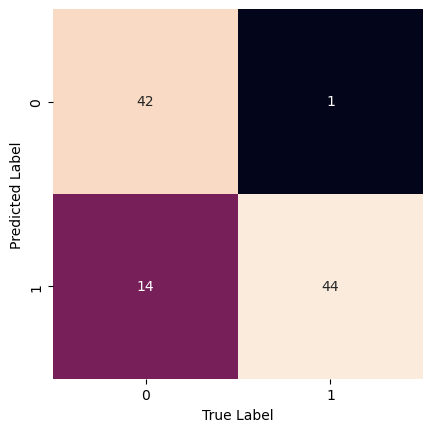

In [30]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y.unique(),
            yticklabels=y.unique())
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Footer

In [34]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is our own work.")
print("Signed by:")
print("Kelompok   : {}".format(myGroup))
print("Time-stamp : {}".format(myDate))

I certify that this is our own work.
Signed by:
Kelompok   : Kelompok A
Time-stamp : 2023-12-10 22:27:01.724644


### Convert notebook to html

In [35]:
!jupyter nbconvert --to html "./IF540_E_KelompokA_TugasAkhir.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_E_KelompokA_TugasAkhir.ipynb to html
[NbConvertApp] Writing 1176102 bytes to IF540_E_KelompokA_TugasAkhir.html
